In [18]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2
import cProfile
import pstats
import numpy as np
from matplotlib import pyplot as plt
from PIL import ImageFont, ImageDraw, Image  
plt.rcParams['figure.figsize'] = [5, 5]

In [2]:
#densityMap = '''$@@B%8&WMM###HoahkbdpqwmZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~<>i!lI;:,"^`'.           '''
#densityMap = '#HXI0O+_1l'
densityMap = 'Ñ@&#eaO|!*+;:=-,._ '
densityMap = np.array( list( densityMap ) )

In [3]:
len( densityMap )

19

In [4]:
def getImage( path ):
    img = cv2.imread( path, 0 )
    img = cv2.cvtColor( img, cv2.COLOR_BGR2RGB )
    img = cv2.resize( img, ( 100, 100 ) )
    return img

In [5]:
def deStackImage( img ):
    return img[:,:,1].astype('float64')

In [6]:
def normalizeImage( img, max_, inplace = True ):
    if inplace:
        img *= float(max_)/img.max()
        return img.astype(int)
    return ( img * float(max_)/img.max() ).astype(int)

In [7]:
def getasciiArray( img, map_ ):
    return map_[img]

In [8]:
def getBlankImageFromReferenceImage( img, base, scaleby ):
    width = int( 1303 * img.shape[1] * scaleby )
    height = int( 1500 * img.shape[0] * scaleby )
    return Image.fromarray( np.full( ( height, width, 3 ), 255, dtype = np.uint8 ) )

In [9]:
def writeAsciiArrayOnBlankImage( asciiArray, font ):
    img = getBlankImageFromReferenceImage( asciiArray, 255, 0.01 )
    draw = ImageDraw.Draw( img )
    for i,row in enumerate( asciiArray ):
        org = (0, 15 * i)
        text = ''.join( row )
        draw.text( org, text, font=font, fill=(0, 0, 0) )
    return img

In [10]:
def pilToCV2( pilImage ):
    return cv2.cvtColor(np.array(pilImage), cv2.COLOR_RGB2BGR)

In [11]:
def main():
    img         = getImage( 'jupiter.jpg' )
    img_        = normalizeImage( deStackImage( img ), len( densityMap ) - 1, inplace = False )
    asciiArray  = getasciiArray( img_, densityMap )
    img_        = writeAsciiArrayOnBlankImage( asciiArray, font = ImageFont.truetype("consola.ttf", 24) )
    opencvImage = pilToCV2( img_ )
    return img, img_, opencvImage

In [16]:
with cProfile.Profile() as profile:
    img, img_, opencvImage = main()

In [31]:
stats = pstats.Stats( profile ).strip_dirs().sort_stats("cumtime")
stats.print_stats(20)

         1842 function calls (1841 primitive calls) in 0.971 seconds

   Ordered by: cumulative time
   List reduced from 95 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.971    0.971 839515690.py:1(main)
        1    0.001    0.001    0.957    0.957 3931411922.py:1(writeAsciiArrayOnBlankImage)
      100    0.001    0.000    0.945    0.009 ImageDraw.py:355(text)
      100    0.001    0.000    0.943    0.009 ImageDraw.py:402(draw_text)
      100    0.001    0.000    0.861    0.009 ImageFont.py:593(getmask2)
      100    0.507    0.005    0.507    0.005 {method 'render' of 'Font' objects}
      100    0.352    0.004    0.352    0.004 {method 'getsize' of 'Font' objects}
      100    0.081    0.001    0.081    0.001 {method 'draw_bitmap' of 'ImagingDraw' objects}
        1    0.000    0.000    0.009    0.009 174053031.py:1(pilToCV2)
      2/1    0.003    0.001    0.008    0.008 {built-in method numpy

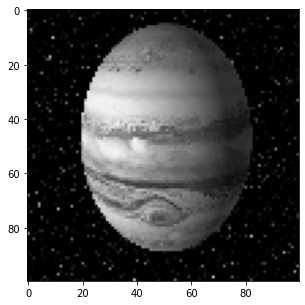

In [13]:
plt.imshow(img)

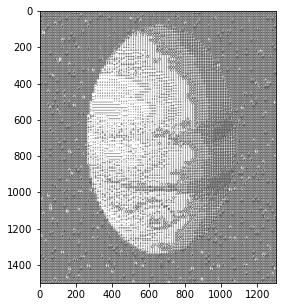

In [14]:
plt.imshow(opencvImage)

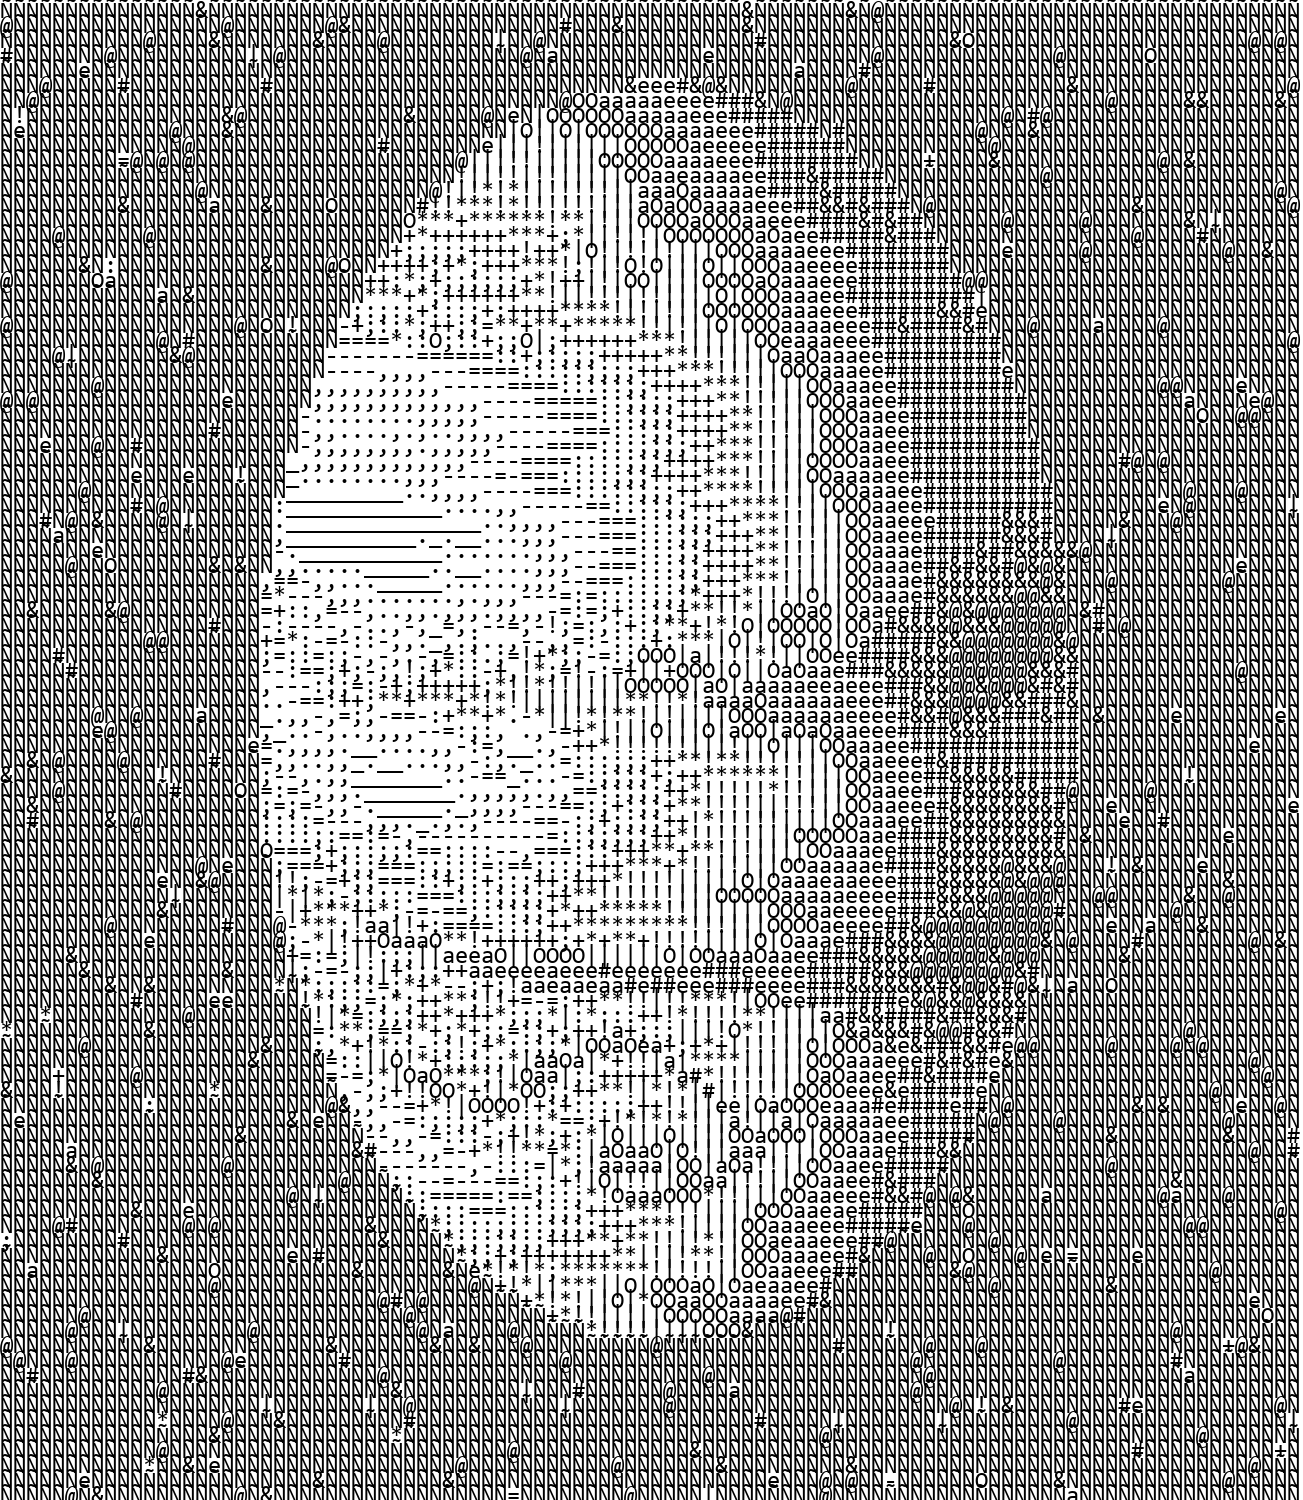

In [15]:
img_